In [98]:
# Import des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:

# Charger les données depuis le fichier CSV
df = pd.read_csv('../dataset/consommation-quotidienne-brute.csv', nrows =50000,sep=';', header=0, index_col=False)
df.head(5)



,Date - Heure,Date,Heure,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Statut - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW)
0,2023-11-30T23:30:00+01:00,30/11/2023,23:30,NaN,NaN,NaN,NaN,NaN,60491,Consolidé,NaN
1,2023-11-30T23:00:00+01:00,30/11/2023,23:00,64713.0,Définitif,3126.0,Définitif,67839.0,61153,Consolidé,128992.0
2,2023-11-30T22:30:00+01:00,30/11/2023,22:30,NaN,NaN,NaN,NaN,NaN,62387,Consolidé,NaN
3,2023-11-30T22:00:00+01:00,30/11/2023,22:00,69016.0,Définitif,3547.0,Définitif,72563.0,61421,Consolidé,133984.0
4,2023-11-30T21:30:00+01:00,30/11/2023,21:30,NaN,NaN,NaN,NaN,NaN,61283,Consolidé,NaN


## Analyse Exploratoire des Données (EDA) avant le pretraitement

In [100]:
# Explorer les statistiques descriptives
descriptive_stats = df.describe()
descriptive_stats

,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Consommation brute totale (MW)
count,25000.000000,24997.000000,24997.000000,50000.000000,24997.000000
mean,44248.042960,2658.628675,46903.199664,50793.630100,97704.205385
std,24233.085557,1846.194117,25990.931042,10956.588092,36168.430317
min,1363.000000,153.000000,1877.000000,29660.000000,42919.000000
25%,24345.000000,1173.000000,25544.000000,42745.000000,69074.000000
50%,36273.000000,1897.000000,38165.000000,48987.000000,85392.000000
75%,61387.000000,3852.000000,65267.000000,57526.250000,122782.000000
max,296157.000000,9800.000000,297703.000000,86978.000000,346191.000000


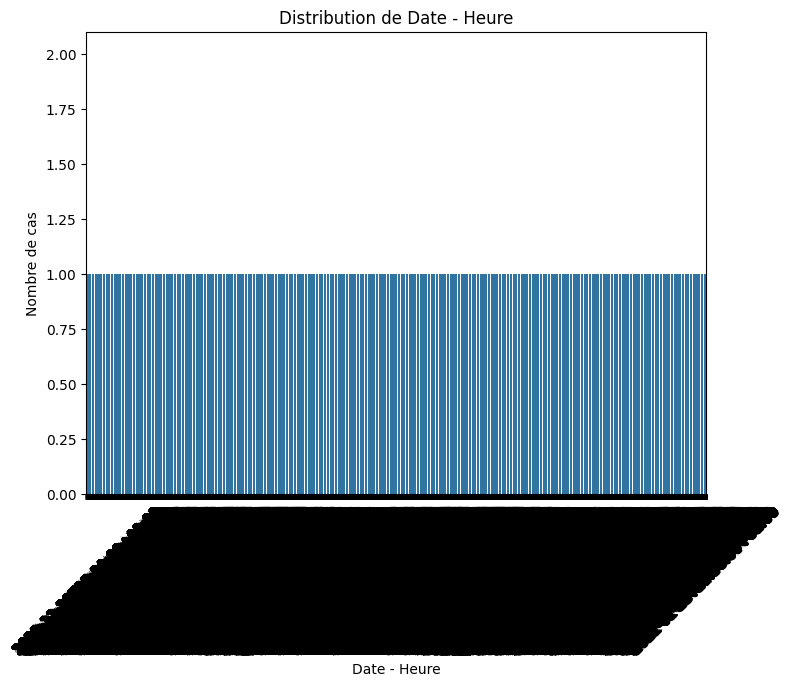

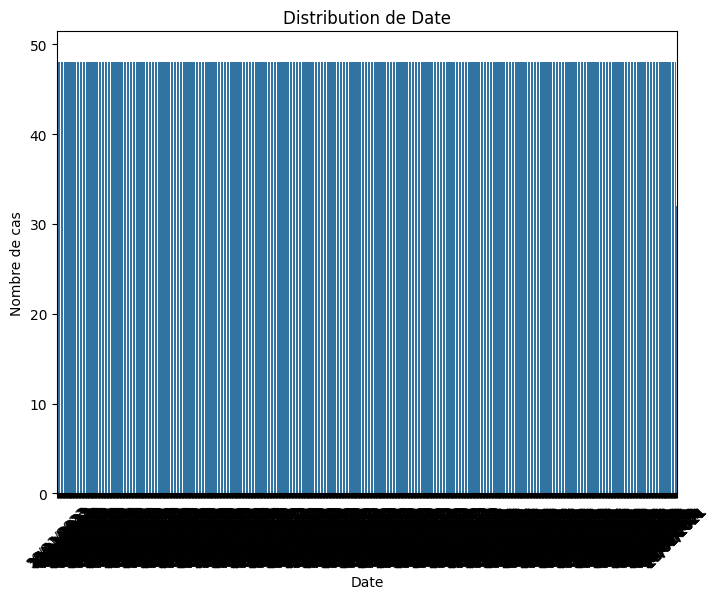

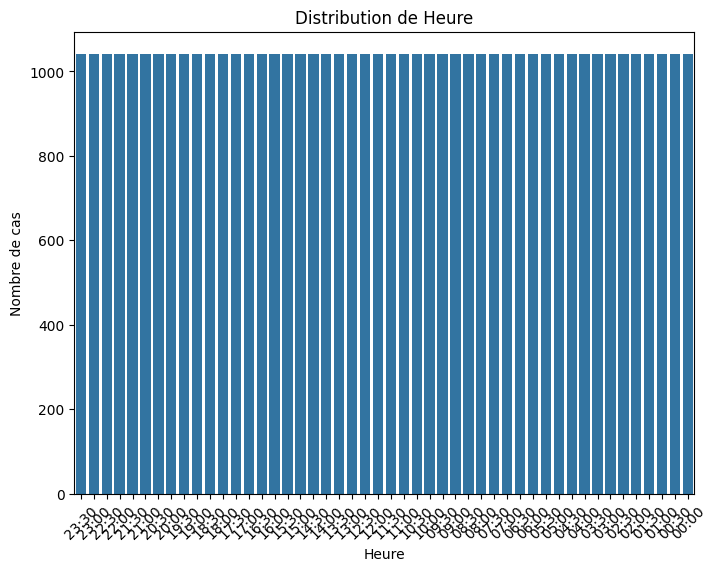

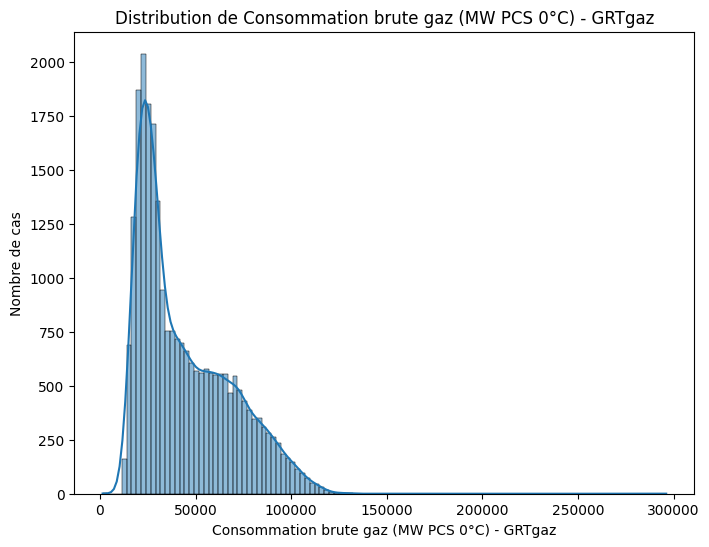

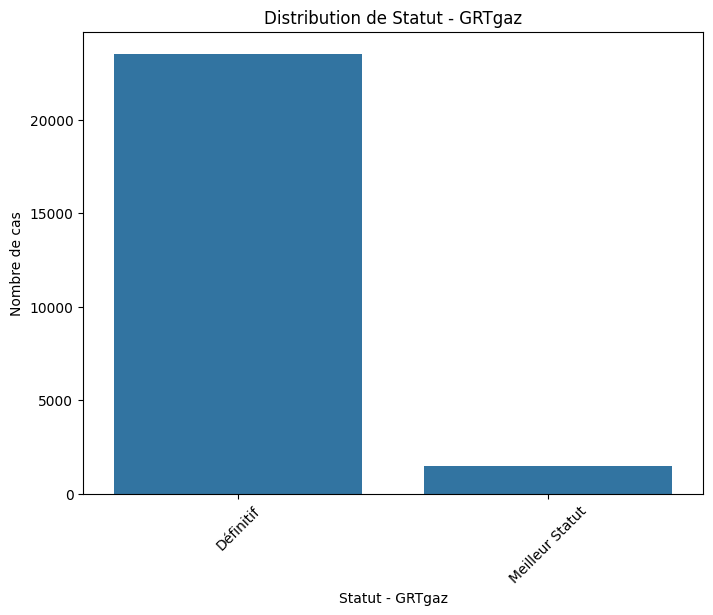

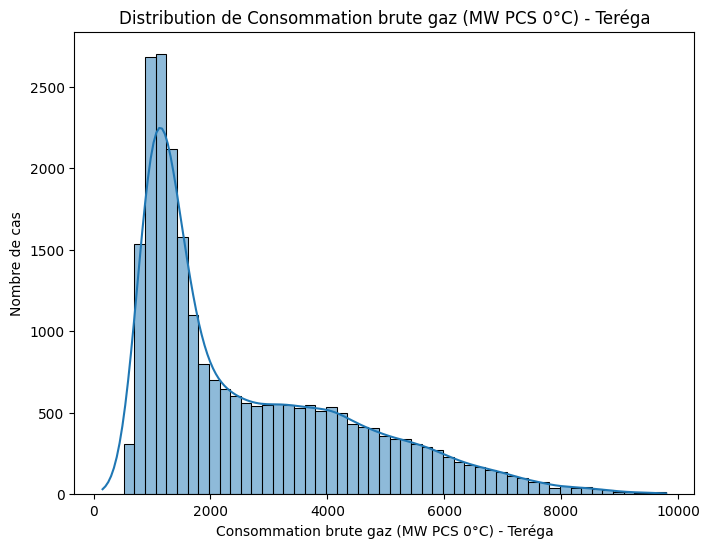

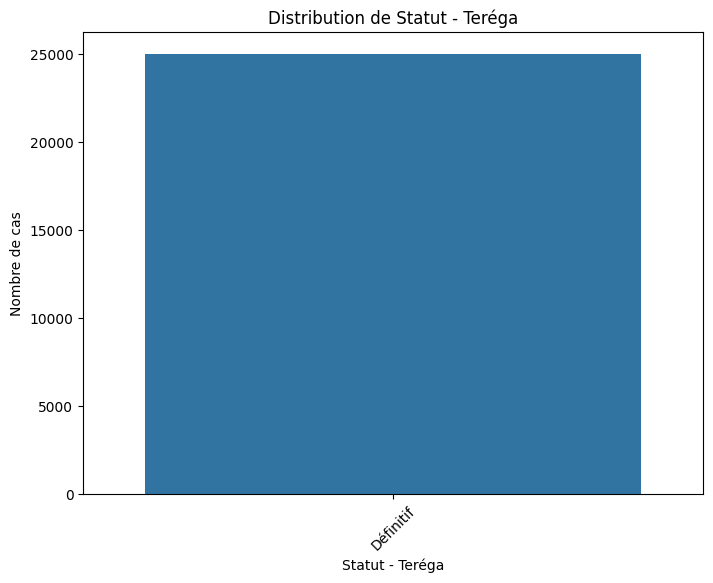

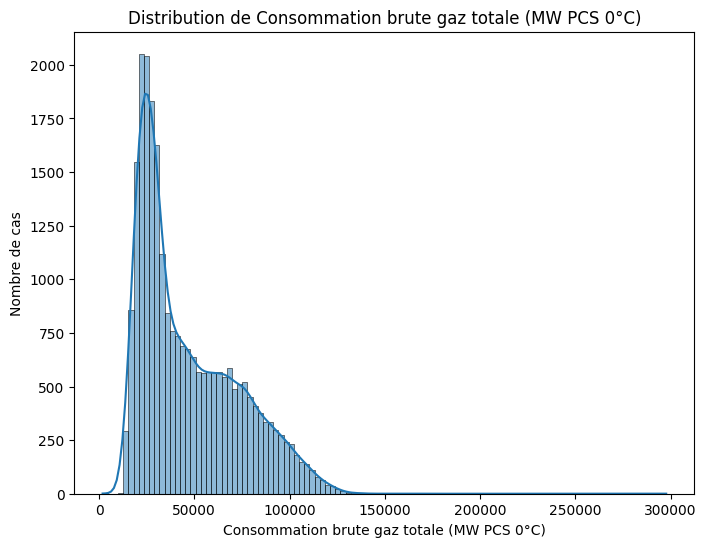

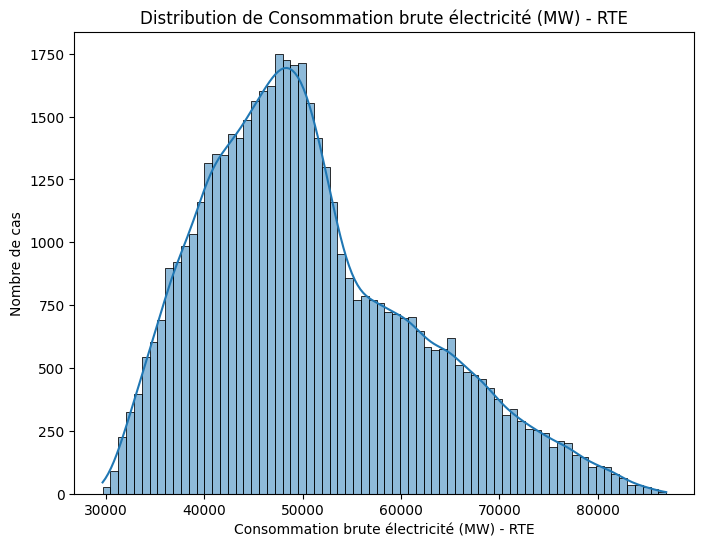

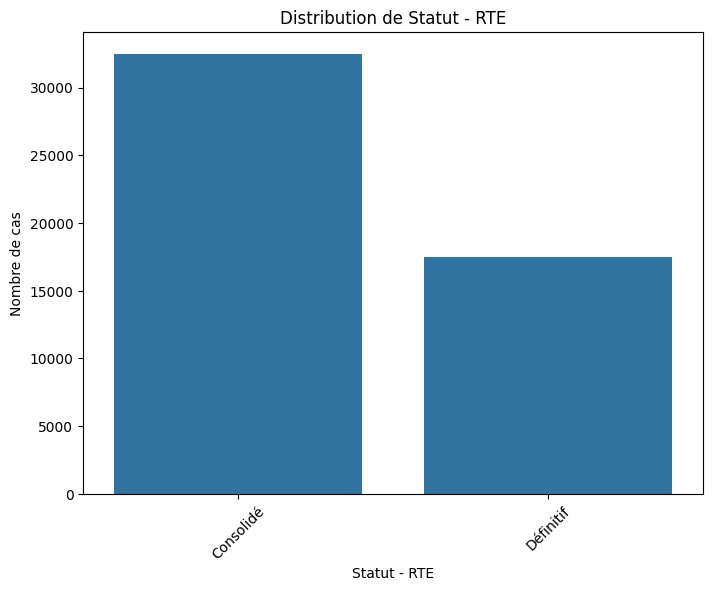

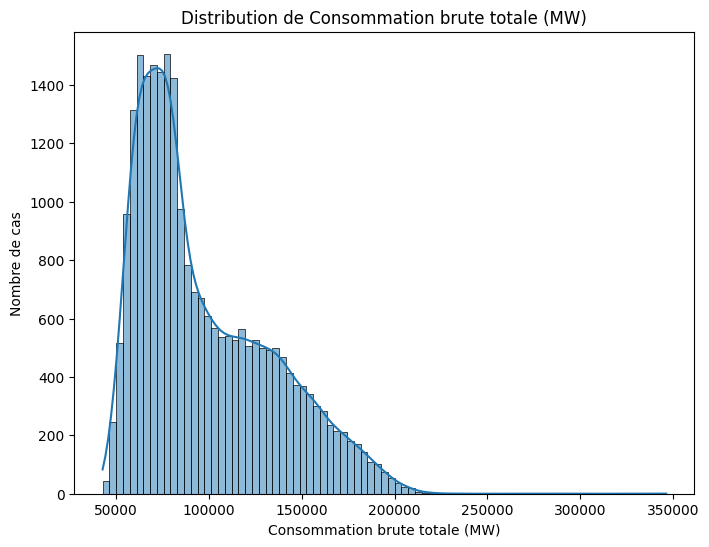

In [101]:
def visualize_data(df):
    """
    Visualise la distribution des valeurs pour chaque colonne du DataFrame.

    Args:
        df (pandas.DataFrame): Le DataFrame contenant les données.

    Returns:
        None
    """
    # Itérer à travers chaque colonne du DataFrame
    for column in df.columns:
        # Vérifier si la colonne contient des valeurs numériques
        if df[column].dtype in ['int64', 'float64']:
            # Créer un histogramme pour les valeurs numériques
            plt.figure(figsize=(8, 6))
            sns.histplot(df[column].dropna(), kde=True)
            plt.title(f'Distribution de {column}')
            plt.xlabel(column)
            plt.ylabel('Nombre de cas')
            plt.show()
        else:
            # Créer un graphique à barres pour les valeurs non numériques
            plt.figure(figsize=(8, 6))
            sns.countplot(x=column, data=df)
            plt.title(f'Distribution de {column}')
            plt.xlabel(column)
            plt.ylabel('Nombre de cas')
            plt.xticks(rotation=45)
            plt.show()

# Utilisation de la fonction
visualize_data(df)

## Prétraitement des Données
---

### Gestion valeurs manquantes

In [102]:
df.columns

Index(['Date - Heure', 'Date', 'Heure',
       'Consommation brute gaz (MW PCS 0°C) - GRTgaz', 'Statut - GRTgaz',
       'Consommation brute gaz (MW PCS 0°C) - Teréga', 'Statut - Teréga',
       'Consommation brute gaz totale (MW PCS 0°C)',
       'Consommation brute électricité (MW) - RTE', 'Statut - RTE',
       'Consommation brute totale (MW)'],
      dtype='object')

In [103]:
df.drop(columns=['Date - Heure'],inplace=True)

In [104]:
def print_column_types(df):
    """
    Affiche le type de chaque colonne dans le DataFrame.

    Args:
        df (pandas.DataFrame): Le DataFrame contenant les données.

    Returns:
        None
    """
    print("Type de chaque colonne :")
    print(df.dtypes)

# Utilisation de la fonction
print_column_types(df)


Type de chaque colonne :
Date                                             object
Heure                                            object
Consommation brute gaz (MW PCS 0°C) - GRTgaz    float64
Statut - GRTgaz                                  object
Consommation brute gaz (MW PCS 0°C) - Teréga    float64
Statut - Teréga                                  object
Consommation brute gaz totale (MW PCS 0°C)      float64
Consommation brute électricité (MW) - RTE         int64
Statut - RTE                                     object
Consommation brute totale (MW)                  float64
dtype: object


In [105]:
def display_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

# Display unique values for categoriel colone
colones_categorielles = df.select_dtypes(include=['object']).columns
display_unique_values(df, colones_categorielles)

Unique values in column 'Date': ['30/11/2023' '29/11/2023' '28/11/2023' ... '25/01/2021' '24/01/2021'
 '23/01/2021']
Unique values in column 'Heure': ['23:30' '23:00' '22:30' '22:00' '21:30' '21:00' '20:30' '20:00' '19:30'
 '19:00' '18:30' '18:00' '17:30' '17:00' '16:30' '16:00' '15:30' '15:00'
 '14:30' '14:00' '13:30' '13:00' '12:30' '12:00' '11:30' '11:00' '10:30'
 '10:00' '09:30' '09:00' '08:30' '08:00' '07:30' '07:00' '06:30' '06:00'
 '05:30' '05:00' '04:30' '04:00' '03:30' '03:00' '02:30' '02:00' '01:30'
 '01:00' '00:30' '00:00']
Unique values in column 'Statut - GRTgaz': [nan 'Définitif' 'Meilleur Statut']
Unique values in column 'Statut - Teréga': [nan 'Définitif']
Unique values in column 'Statut - RTE': ['Consolidé' 'Définitif']


In [106]:

def remove_nan_rows(df, column_name):
    """
    Supprime les lignes avec des valeurs NaN dans une colonne spécifique.

    Args:
        df (pandas.DataFrame): Le DataFrame contenant les données.
        column_name (str): Le nom de la colonne à vérifier.

    Returns:
        pandas.DataFrame: Le DataFrame filtré.
    """
    df = df.dropna(subset=[column_name])
    return df


# Utilisation des fonctions pour chaque colonne
df=remove_nan_rows(df, 'Statut - GRTgaz')
df=remove_nan_rows(df, 'Statut - Teréga')


In [107]:
def handle_missing_values(df):
    """
    Gère les valeurs manquantes dans un DataFrame.

    Si le pourcentage de valeurs manquantes dans une colonne dépasse 55 %,
    les lignes contenant des valeurs manquantes dans cette colonne seront supprimées.
    Sinon, le pourcentage de valeurs manquantes dans cette colonne sera simplement imprimé.

    Args:
        df (pandas.DataFrame): Le DataFrame contenant les données.

    Returns:
        pandas.DataFrame: Le DataFrame après traitement des valeurs manquantes.
    """
    total_rows = len(df)
    for column in df.columns:
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / total_rows) * 100
        print(f"Percentage of missing values in column '{column}': {missing_percentage:.1f}%")

        if missing_percentage > 55:
            print(f"Removing rows with missing values in column '{column}'...")
            df = df.dropna(subset=[column])
            print(f"{len(df)} rows remaining after removing missing values in column '{column}'.")

    return df


df = handle_missing_values(df)


Percentage of missing values in column 'Date': 0.0%
Percentage of missing values in column 'Heure': 0.0%
Percentage of missing values in column 'Consommation brute gaz (MW PCS 0°C) - GRTgaz': 0.2%
Percentage of missing values in column 'Statut - GRTgaz': 0.0%
Percentage of missing values in column 'Consommation brute gaz (MW PCS 0°C) - Teréga': 0.2%
Percentage of missing values in column 'Statut - Teréga': 0.0%
Percentage of missing values in column 'Consommation brute gaz totale (MW PCS 0°C)': 0.2%
Percentage of missing values in column 'Consommation brute électricité (MW) - RTE': 0.0%
Percentage of missing values in column 'Statut - RTE': 0.0%
Percentage of missing values in column 'Consommation brute totale (MW)': 0.2%


In [108]:
df

,Date,Heure,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Statut - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW)
1,30/11/2023,23:00,64713.0,Définitif,3126.0,Définitif,67839.0,61153,Consolidé,128992.0
3,30/11/2023,22:00,69016.0,Définitif,3547.0,Définitif,72563.0,61421,Consolidé,133984.0
5,30/11/2023,21:00,74468.0,Définitif,3984.0,Définitif,78452.0,62760,Consolidé,141212.0
7,30/11/2023,20:00,78208.0,Définitif,4278.0,Définitif,82486.0,66333,Consolidé,148819.0
9,30/11/2023,19:00,82662.0,Définitif,4432.0,Définitif,87094.0,70285,Consolidé,157379.0
...,...,...,...,...,...,...,...,...,...,...
49991,23/01/2021,12:00,80446.0,Définitif,5751.0,Définitif,86197.0,69762,Consolidé,155959.0
49993,23/01/2021,11:00,82994.0,Définitif,6043.0,Définitif,89037.0,68561,Consolidé,157598.0
49995,23/01/2021,10:00,84954.0,Définitif,6323.0,Définitif,91277.0,68489,Consolidé,159766.0
49997,23/01/2021,09:00,86412.0,Définitif,6562.0,Définitif,92974.0,66347,Consolidé,159321.0


In [109]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
columns_with_missing_values = missing_values[missing_values > 0]

# Afficher les résultats
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

print("\nColonnes avec des valeurs manquantes :")
print(columns_with_missing_values)

Nombre de valeurs manquantes par colonne :
Date                                             0
Heure                                            0
Consommation brute gaz (MW PCS 0°C) - GRTgaz    48
Statut - GRTgaz                                  0
Consommation brute gaz (MW PCS 0°C) - Teréga    51
Statut - Teréga                                  0
Consommation brute gaz totale (MW PCS 0°C)      51
Consommation brute électricité (MW) - RTE        0
Statut - RTE                                     0
Consommation brute totale (MW)                  51
dtype: int64

Colonnes avec des valeurs manquantes :
Consommation brute gaz (MW PCS 0°C) - GRTgaz    48
Consommation brute gaz (MW PCS 0°C) - Teréga    51
Consommation brute gaz totale (MW PCS 0°C)      51
Consommation brute totale (MW)                  51
dtype: int64


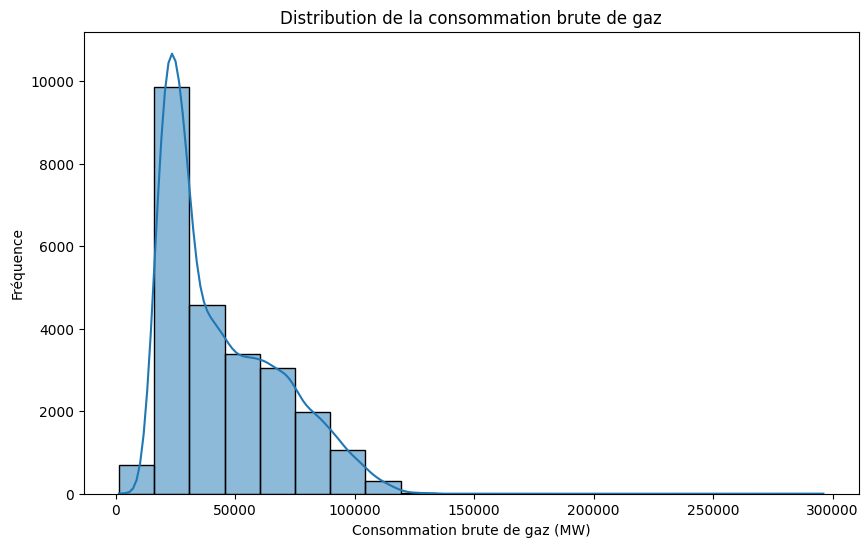

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Consommation brute gaz (MW PCS 0°C) - GRTgaz', bins=20, kde=True)
plt.title('Distribution de la consommation brute de gaz')
plt.xlabel('Consommation brute de gaz (MW)')
plt.ylabel('Fréquence')
plt.show()


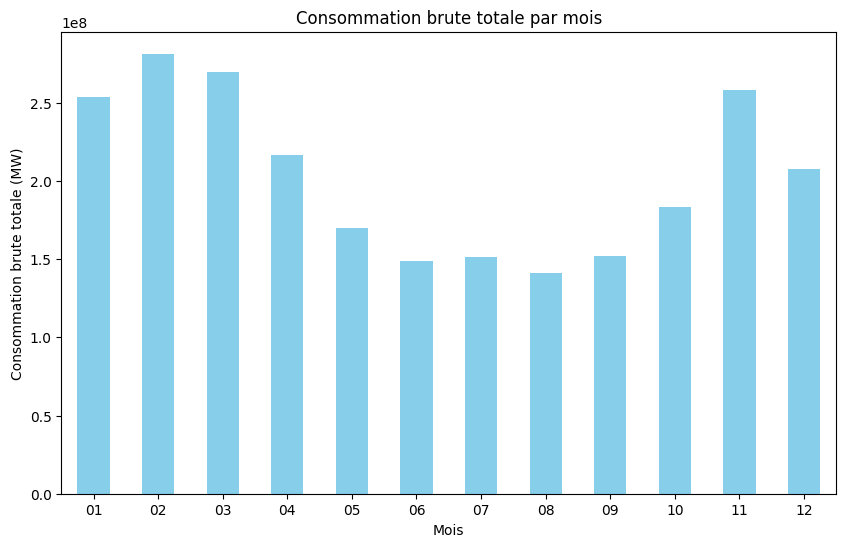

In [111]:
plt.figure(figsize=(10, 6))
monthly_total_consumption = df.groupby(df['Date'].str.split('/').str[1])['Consommation brute totale (MW)'].sum()
monthly_total_consumption.plot(kind='bar', color='skyblue')
plt.title('Consommation brute totale par mois')
plt.xlabel('Mois')
plt.ylabel('Consommation brute totale (MW)')
plt.xticks(rotation=0)
plt.show()


/tmp/ipykernel_204842/3481535961.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.dayofweek
/tmp/ipykernel_204842/3481535961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day_of_Week', y='Consommation brute gaz (MW PCS 0°C) - GRTgaz', data=df, palette='Set3')


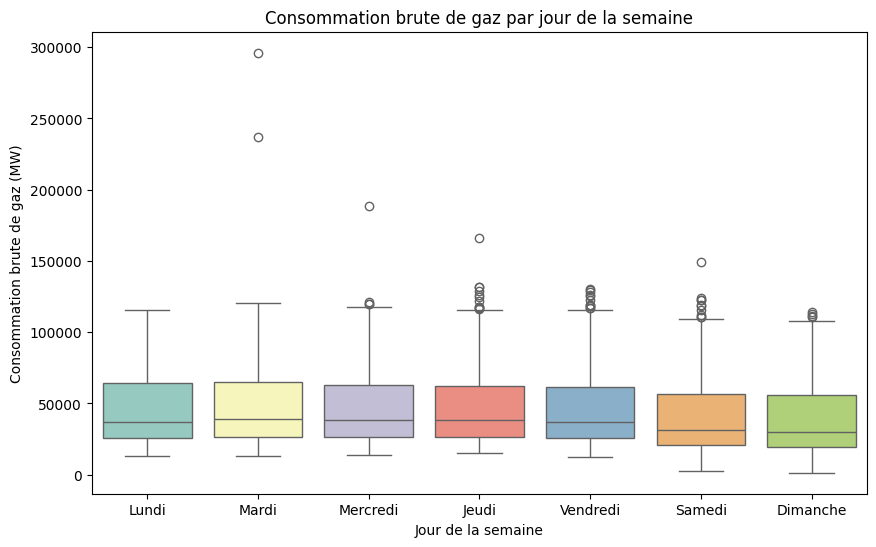

In [112]:
plt.figure(figsize=(10, 6))
df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.dayofweek
sns.boxplot(x='Day_of_Week', y='Consommation brute gaz (MW PCS 0°C) - GRTgaz', data=df, palette='Set3')
plt.title('Consommation brute de gaz par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Consommation brute de gaz (MW)')
plt.xticks(ticks=range(7), labels=['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.show()


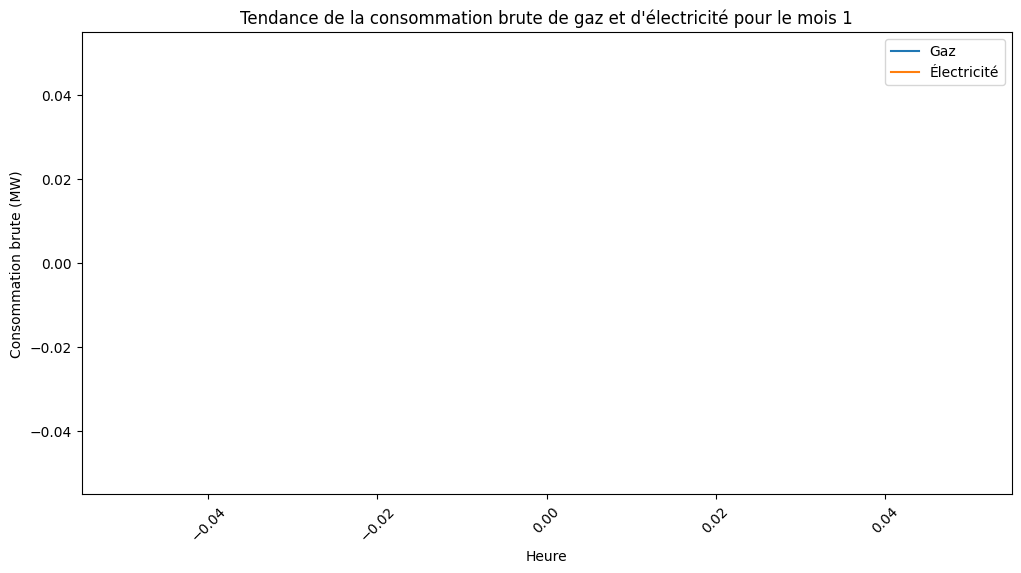

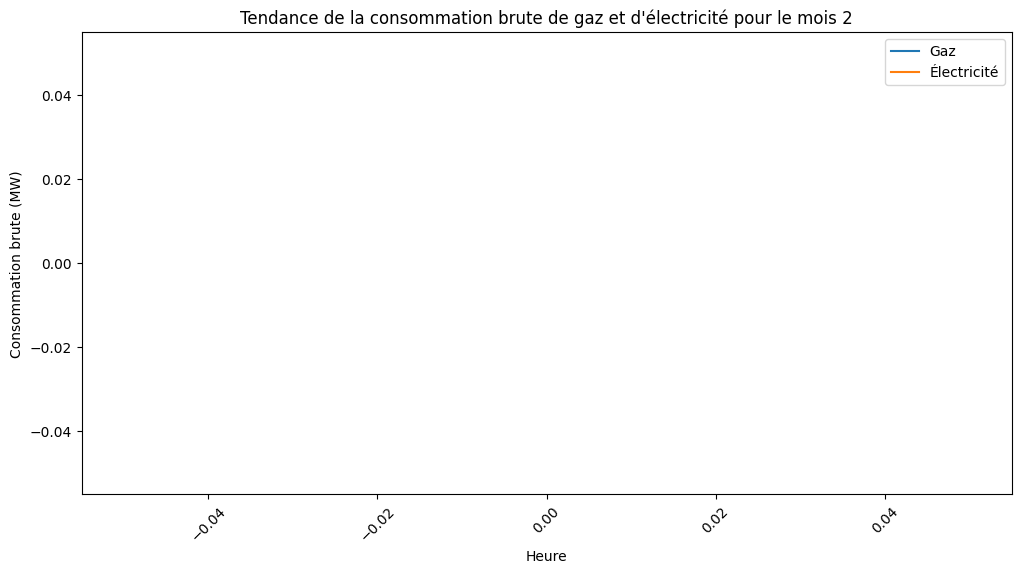

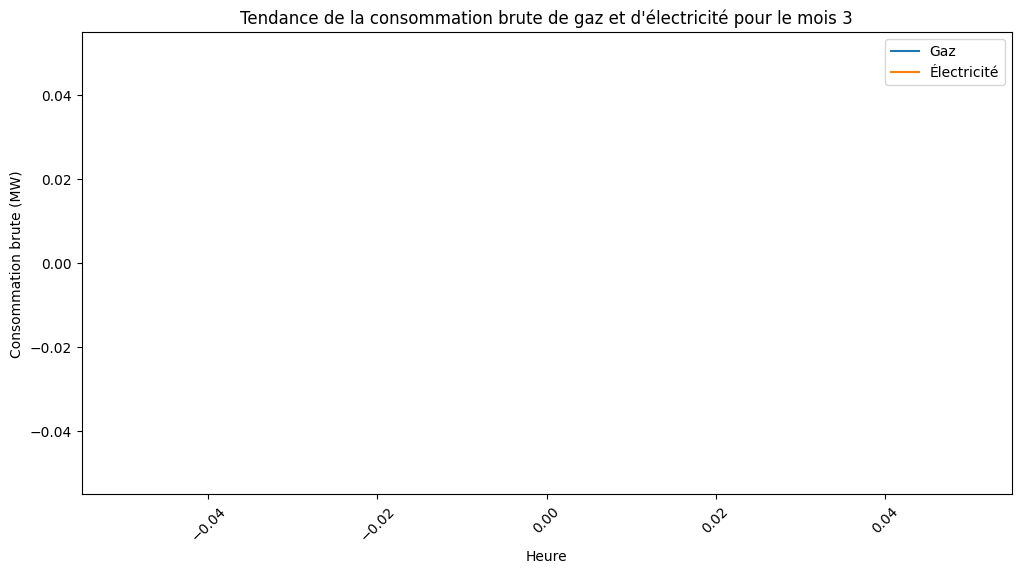

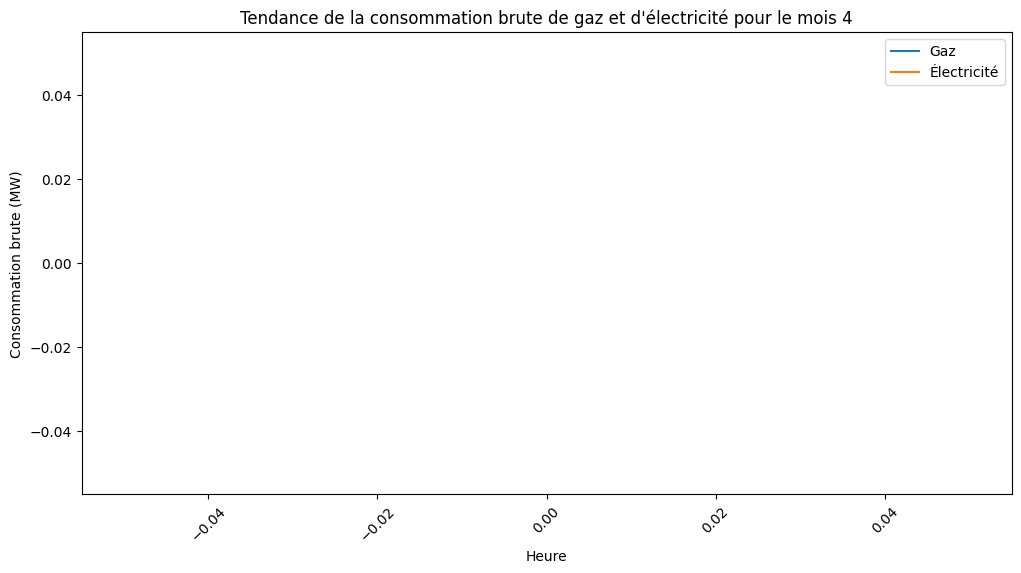

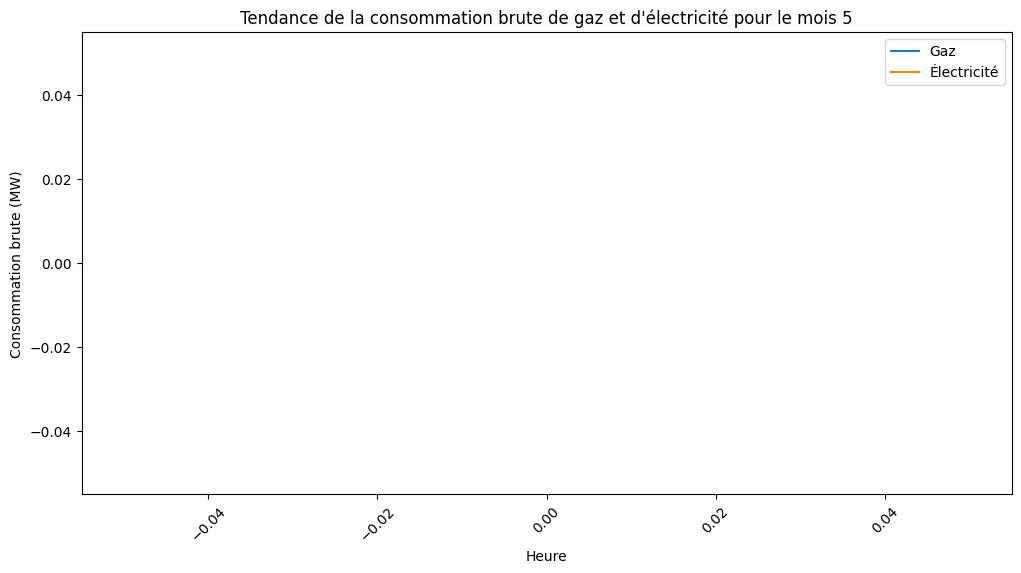

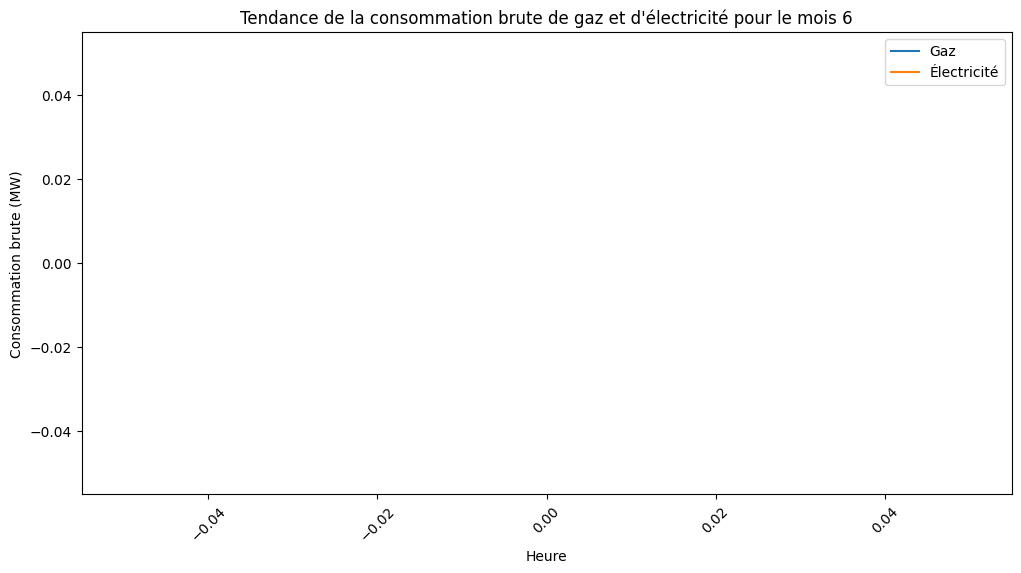

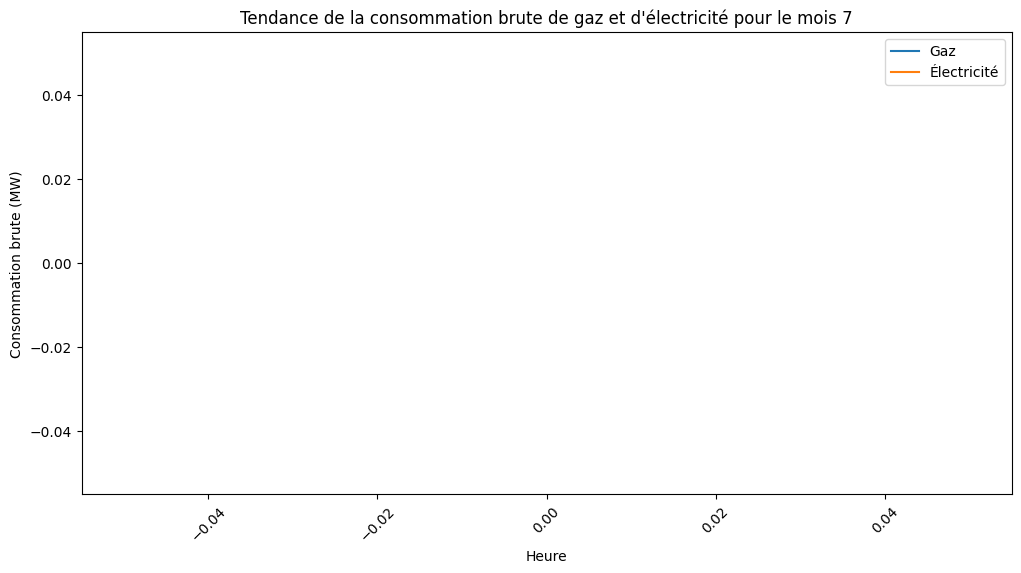

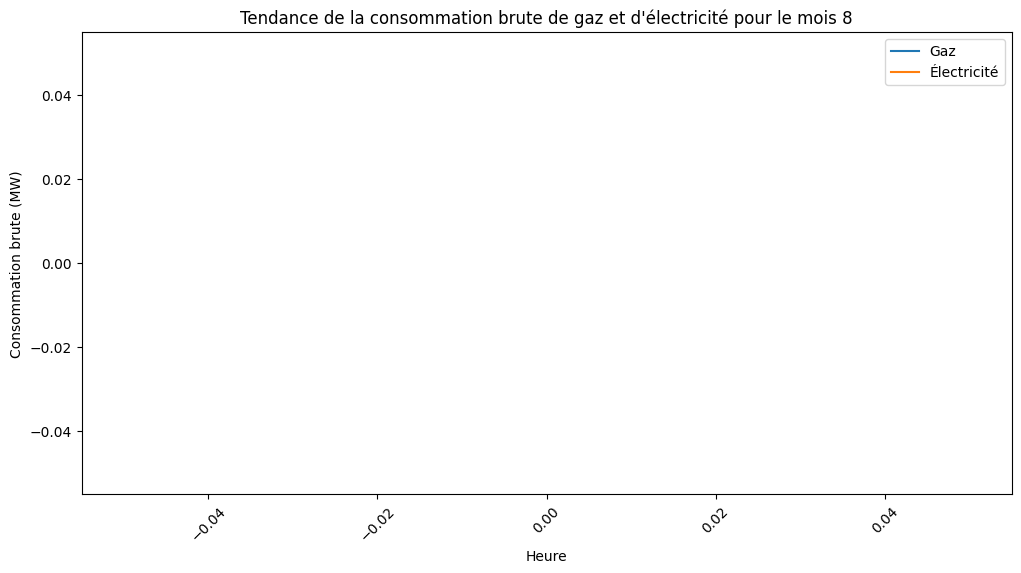

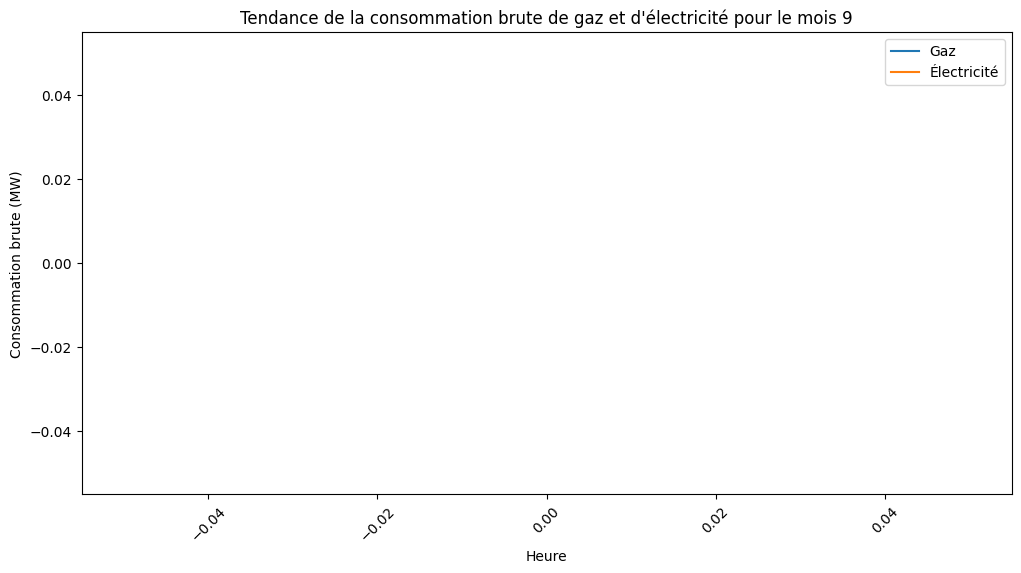

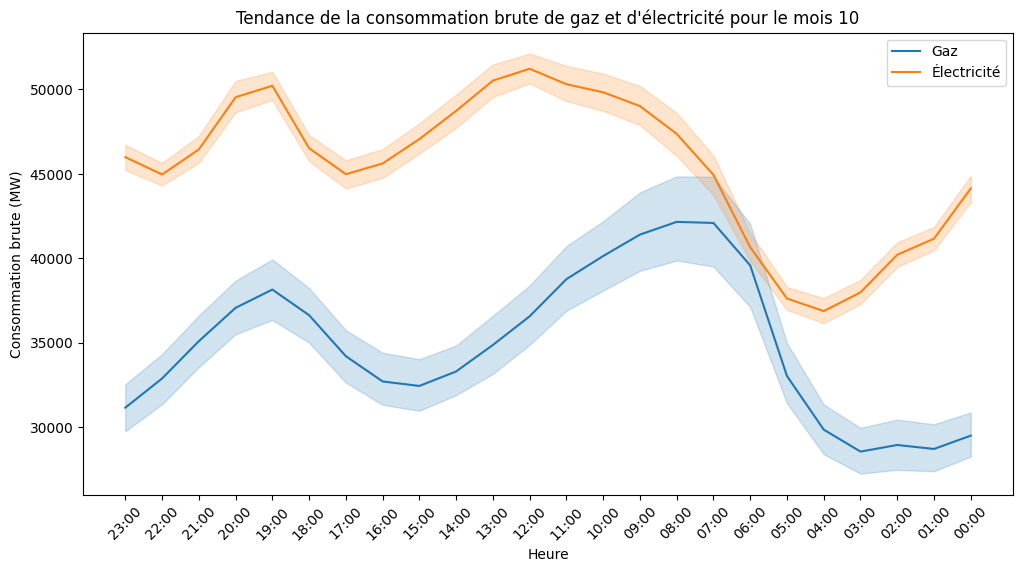

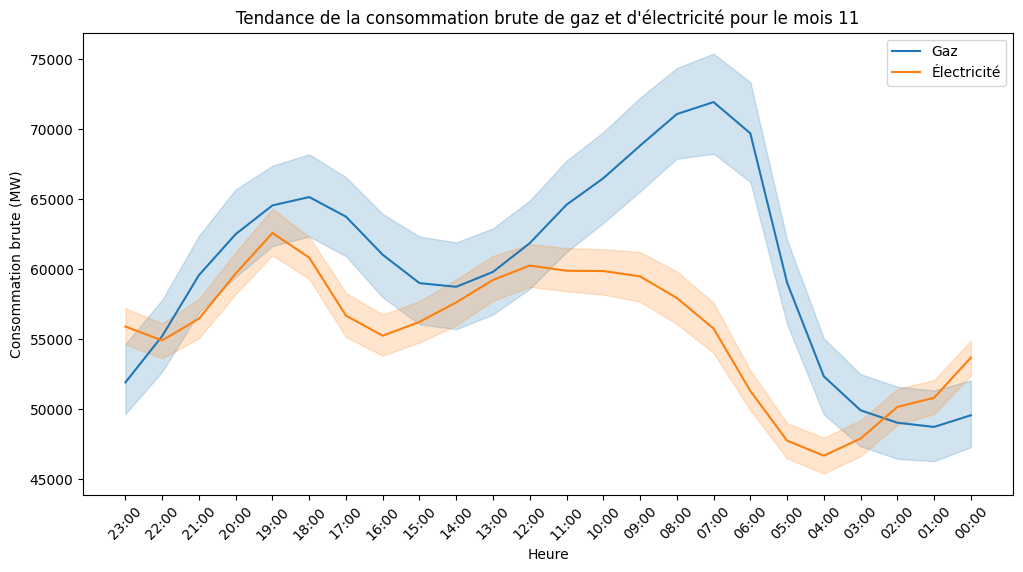

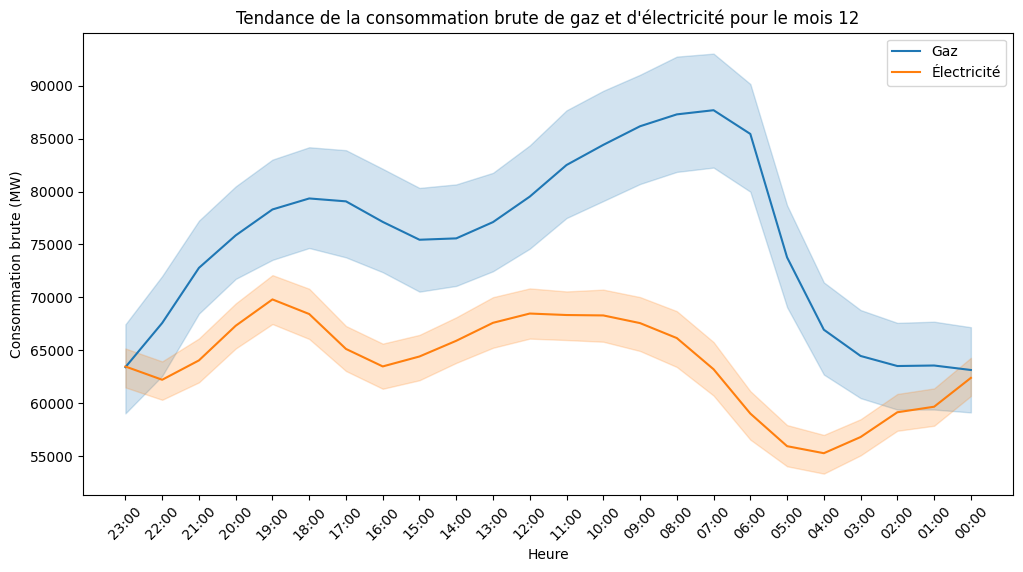

In [113]:
def visualize_monthly_consumption(df, month):
    # Filtrer les données pour le mois spécifié
    df_month = df[(df['Date'].str.split('/').str[1] == str(month))]

    # Visualisation de la tendance de la consommation brute de gaz et d'électricité au fil du temps
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Heure', y='Consommation brute gaz (MW PCS 0°C) - GRTgaz', data=df_month, label='Gaz')
    sns.lineplot(x='Heure', y='Consommation brute électricité (MW) - RTE', data=df_month, label='Électricité')
    plt.title(f"Tendance de la consommation brute de gaz et d'électricité pour le mois {month}")
    plt.xlabel('Heure')
    plt.ylabel('Consommation brute (MW)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Définir une liste des mois pour lesquels vous voulez visualiser les données
months = range(1, 13)  # De 1 à 12 pour représenter les mois de l'année

# Boucle sur chaque mois et visualiser les données pour ce mois
for month in months:
    visualize_monthly_consumption(df, month)

